Solution by Marceli P

Using the attached data set 'glass.csv' (the class is the last column of data) train 2 classifiers (previously dividing the set into training and testing with the parameter random_state = 0):
- logistic regression algorithm,
- random forest algorithm.

On the basis of the test data set, generate an illustration of the error matrix using the plot_confusion_matrix function and calculate the accuracy of the classifier. Choose a better classifier based on the classifier's average precision.
Plot the ROC curve and calculate its AUC.

In [49]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, precision_score, recall_score, classification_report

In [50]:
data=np.loadtxt("glass.csv",delimiter=",",skiprows=1)
#print(data)

In [51]:
y=data[:,-1]#.astype(np.uint)
X = data[:, :-1]
X_train, X_test, y_train,y_test = train_test_split(X, y, random_state=0)

In [52]:
#Logistic regression
model_logreg = LogisticRegression(solver='lbfgs', max_iter=15000)
model_logreg.fit(X_train,y_train)
y_pred_logreg = model_logreg.predict(X_test)
print ("Average accuracy for logistic regression is: ", accuracy_score(y_test, y_pred_logreg) * 100, "%")

Average accuracy for logistic regression is:  55.55555555555556 %


In [53]:
precision = precision_score(y_test,y_pred_logreg,average=None)
recall = recall_score(y_test,y_pred_logreg,average=None)
print(precision,recall)
print(classification_report(y_test,y_pred_logreg))

[0.53846154 0.52631579 0.         0.66666667 0.         0.66666667] [0.82352941 0.55555556 0.         0.66666667 0.         0.8       ]
              precision    recall  f1-score   support

         1.0       0.54      0.82      0.65        17
         2.0       0.53      0.56      0.54        18
         3.0       0.00      0.00      0.00         8
         5.0       0.67      0.67      0.67         3
         6.0       0.00      0.00      0.00         3
         7.0       0.67      0.80      0.73         5

    accuracy                           0.56        54
   macro avg       0.40      0.47      0.43        54
weighted avg       0.44      0.56      0.49        54



C:\Users\Marceli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marceli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marceli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMe

C:\Users\Marceli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


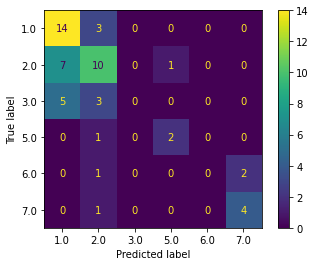

In [54]:
plot = plot_confusion_matrix(model_logreg, X_test, y_test, normalize=None)#, display_labels=[0,1],cmap=plt.cm.Blues)
plt.show()

In [55]:
#Random forest classifier
model_forests = RandomForestClassifier(n_estimators=200, max_leaf_nodes=15, random_state=0, n_jobs=-1)
model_forests.fit(X_train, y_train)

y_pred_forest=model_forests.predict(X_test)
print ("Average accuracy for random forest classifier is: ", accuracy_score(y_test, y_pred_forest) * 100, "%")

Average accuracy for random forest classifier is:  70.37037037037037 %


In [56]:
#print(set(y_test) - set(y_pred_logreg))
#print(set(y_test) - set(y_pred_forest))
#Red notifications are shown, because of diffrent size of y_pred and y_test
#and there is no F-score to be calculated for this arguments


In [57]:
precision = precision_score(y_test,y_pred_forest,average=None)
recall = recall_score(y_test,y_pred_forest,average=None)
print(precision,recall)
print(classification_report(y_test,y_pred_forest))

[0.61538462 0.77777778 0.         1.         1.         0.66666667] [0.94117647 0.77777778 0.         0.66666667 0.66666667 0.8       ]
              precision    recall  f1-score   support

         1.0       0.62      0.94      0.74        17
         2.0       0.78      0.78      0.78        18
         3.0       0.00      0.00      0.00         8
         5.0       1.00      0.67      0.80         3
         6.0       1.00      0.67      0.80         3
         7.0       0.67      0.80      0.73         5

    accuracy                           0.70        54
   macro avg       0.68      0.64      0.64        54
weighted avg       0.63      0.70      0.65        54



C:\Users\Marceli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marceli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marceli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMe

C:\Users\Marceli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


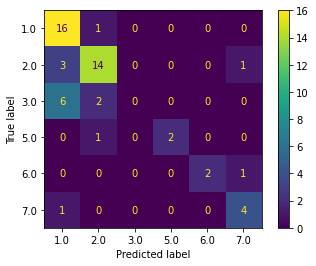

In [58]:
plot = plot_confusion_matrix(model_forests, X_test, y_test, normalize=None)#, display_labels=[0,1],cmap=plt.cm.Blues)
plt.show()

Klasyfikator lasów uzyskał większą dokładność

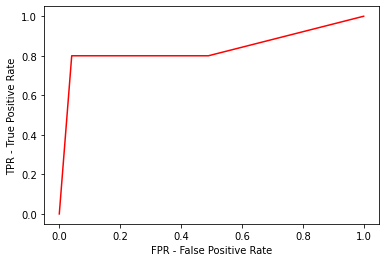

In [59]:
FPR, TPR, _ = roc_curve(y_test, y_pred_forest, pos_label=7)
plt.plot(FPR, TPR, color='red')
plt.xlabel('FPR - False Positive Rate')
plt.ylabel('TPR - True Positive Rate')
plt.show()

In [60]:
#For roc_auc_score my matrix shape should be (number_of_labels, number_of_classes) (?)
#To solve axis error I used predict_proba:
auc = roc_auc_score(y_test, model_forests.predict_proba(X_test), multi_class='ovo')
print(auc)

0.9345007262164126


Due to multi-class problem this result may be irrelevant